In [21]:
! pip install -r requirements.txt --upgrade -q


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timesfm

In [2]:
PROJECT_ID = "TO_DO_DEVELOPER"
GCP_LOCATION = "TO_DO_DEVELOPER"
DATASET_ID = "TO_DO_DEVELOPER"
USER = "TO_DO_DEVELOPER"

In [24]:
df = pd.read_gbq(f"{DATASET_ID}.revenue")

# Convert 'Date' and 'Timestamp' columns to datetime
df['date'] = pd.to_datetime(df['date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Preview the data
df.head()

/var/folders/m1/yl808msx0ds4kdnc3dspdb1000p90c/T/ipykernel_10345/3508351343.py:1: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.read_gbq(f"{DATASET_ID}.revenue")


,date,timestamp,product,category,revenue
0,2024-01-12,2024-01-12 23:07:18,Collision Insurance,Basic,325.54
1,2024-01-16,2024-01-16 01:01:58,Collision Insurance,Basic,842.71
2,2024-01-25,2024-01-25 16:59:01,Collision Insurance,Basic,387.20
3,2024-03-02,2024-03-02 19:46:37,Collision Insurance,Basic,616.13
4,2024-03-04,2024-03-04 02:52:38,Collision Insurance,Basic,358.87


**Visualise Data**

*  Here we are visualising the 12 month revene trend on a graph


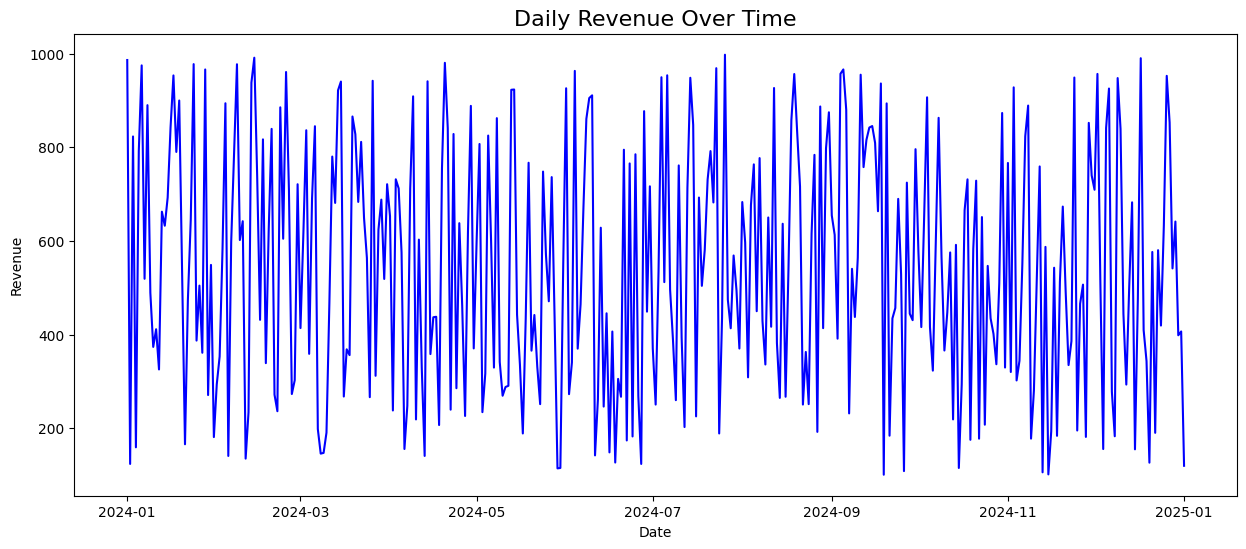

In [25]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='date', y='revenue', data=df, color='blue')
plt.title('Daily Revenue Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()


In [26]:
df = pd.DataFrame({'unique_id':[1]*len(df),'ds': df["timestamp"],
"y":df['revenue']})

In [27]:
# Spliting into 94% and 6%
split_idx = int(len(df) * 0.94)
# Split the dataframe into train and test sets
train_df = df[:split_idx]
test_df = df[split_idx:]
print(train_df.shape, test_df.shape)

(344, 3) (23, 3)


In [28]:
tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="cpu",
          per_core_batch_size=28,
          horizon_len=128,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-1.0-200m-pytorch"),
  )

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

In [29]:
timesfm_forecast = tfm.forecast_on_df(
   inputs=train_df,       # Input training data for training
   freq="MS",             # Frequency of the time-series data
   value_name="y",        # Name of the column containing the values to be forecasted
   num_jobs=-1,           # Set to -1 to use all available cores
)
timesfm_forecast = timesfm_forecast[["ds","timesfm"]]

Processing dataframe with multiple processes.
 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.11.9 (v3.11.9:de54cf5be3, Apr  2 2024, 07:12:50) [Clang 13.0.0 (clang-1300.0.29.30)].
Finished preprocessing dataframe.
Finished forecasting.


In [30]:
timesfm_forecast.head()


,ds,timesfm
0,2025-02-01 21:21:28,543.442749
1,2025-03-01 21:21:28,558.248047
2,2025-04-01 21:21:28,576.689209
3,2025-05-01 21:21:28,589.340210
4,2025-06-01 21:21:28,597.308105


In [20]:
timesfm_forecast.to_csv('output_file.csv', index=False)
